In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
FHS_data = pd.read_excel("C:/Users/erueb/dev/python-projects/STAT400-project-one/Framingham_data.xlsx")

In [34]:
# Part 1
# Examining gender and coronary heart disease fate to see if a relationship exists

genders = ["Male", "Female"]
# Defining conditions that we will need to look for
male = FHS_data["sex"] == 1
totNumMales = len(FHS_data[male])

female = FHS_data["sex"] == 2
totNumFemales = len(FHS_data[female])

noCHD = FHS_data["chdfate"] == 0
numNoCHD = len(FHS_data[noCHD])

hasCHD = FHS_data["chdfate"] == 1
numHasCHD = len(FHS_data[hasCHD])


print("Number of males: {}".format(totNumMales))
print("Number of females: {}".format(totNumFemales))

# Double check that 0 means NOT disease and 1 means HAS disease
print("Number of people NOT diagnosed with coronary heart disease: {}".format(numNoCHD))
print("Number of people diagnosed with coronary heart disease: {}".format(numHasCHD))

Number of males: 2049
Number of females: 2650
Number of people NOT diagnosed with coronary heart disease: 3226
Number of people diagnosed with coronary heart disease: 1473


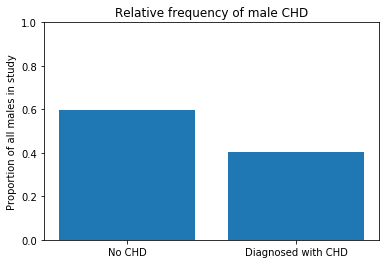

In [35]:
# Histogram for males
numMalesNoCHD = len(FHS_data[male & noCHD])
proportionMaleNoCHD = numMalesNoCHD/totNumMales
numMalesWithCHD = len(FHS_data[male & hasCHD])
proportionMaleHasCHD = numMalesWithCHD/totNumMales

proportionCHDArrM = [proportionMaleNoCHD, proportionMaleHasCHD]
maleCHDGroupsArr = ["No CHD", "Diagnosed with CHD"]

y_pos = np.arange(2)
plt.bar(y_pos, proportionCHDArrM, align='center')
plt.xticks(y_pos, maleCHDGroupsArr)
plt.ylabel('Proportion of all males in study')
plt.title('Relative frequency of male CHD')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()

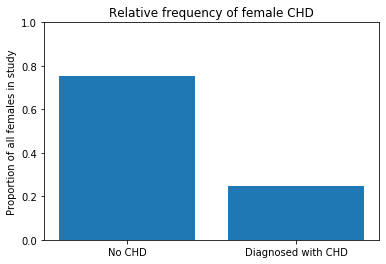

In [36]:
# Histogram for females
numFemalesNoCHD = len(FHS_data[female & noCHD])
proportionFemaleNoCHD = numFemalesNoCHD/totNumFemales
numFemalesWithCHD = len(FHS_data[female & hasCHD])
proportionFemaleHasCHD = numFemalesWithCHD/totNumFemales

proportionCHDArrF = [proportionFemaleNoCHD, proportionFemaleHasCHD]
femaleCHDGroupsArr = ["No CHD", "Diagnosed with CHD"]

y_pos = np.arange(2)
plt.bar(y_pos, proportionCHDArrF, align='center')
plt.xticks(y_pos, maleCHDGroupsArr)
plt.ylabel('Proportion of all females in study')
plt.title('Relative frequency of female CHD')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()

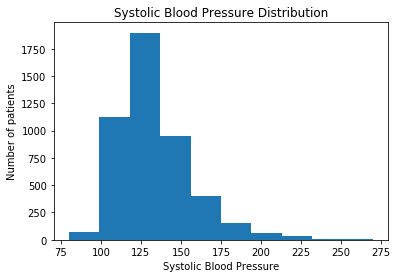

In [38]:
# Part 2
# Examining the relationship between systolic blood pressure and coronary heart disease
# 

sbp = FHS_data["sbp"]
plt.hist(sbp)
plt.title("Systolic Blood Pressure Distribution")
plt.ylabel("Number of patients")
plt.xlabel("Systolic Blood Pressure")
plt.show()

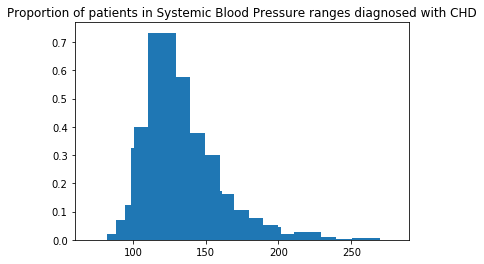

In [176]:
# Histogram with SBP and proportion of CHD for each blood pressure
# TODO: Convert to function
sbp = FHS_data["sbp"]
sbpSortedNoDupes = sbp.sort_values().drop_duplicates().dropna()
chdProportionDict = {}
# Calculate number of 
for i in sbpSortedNoDupes:
    numOfHasCHDForI = len(sbp.where((sbp == i) & hasCHD).dropna())
#     print (numOfHasCHDForI)
#     print("For i = {}".format(i))
    chdProportionDict[i] = numOfHasCHDForI/i
low = sbpSortedNoDupes.iloc[0]
high = sbpSortedNoDupes.iloc[-1]
binWidth = (high - low) / 10
plt.bar(chdProportionDict.keys(), chdProportionDict.values(), width=binWidth)
plt.title("Proportion of patients in Systemic Blood Pressure ranges diagnosed with CHD")
plt.show()

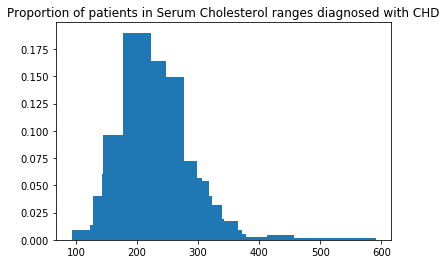

In [177]:
# Histogram with SCL and proportion of CHD for each blood pressure
scl = FHS_data["scl"]
sclSortedNoDupes = scl.sort_values().drop_duplicates().dropna()
chdProportionDictSCL = {}
# Calculate number of 
for i in sclSortedNoDupes:
    numOfHasCHDForI = len(scl.where((scl == i) & hasCHD).dropna())
#     print (numOfHasCHDForI)
#     print("For i = {}".format(i))
    chdProportionDictSCL[i] = numOfHasCHDForI/i
low = sclSortedNoDupes.iloc[0]
high = sclSortedNoDupes.iloc[-1]
binWidth = (high - low) / 10
plt.bar(chdProportionDictSCL.keys(), chdProportionDictSCL.values(), width=binWidth)
plt.title("Proportion of patients in Serum Cholesterol ranges diagnosed with CHD")
plt.show()